___

In [1]:
# Import libraries to be used

# Directories/Files management
import os.path

# Timing
import time

# Data analysis and wrangling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns in DataFrames
## pd.set_option('display.max_rows', None) # It greatly slows down the output display and may freeze the kernel
import missingno as msno
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
import altair as alt

# Machine Learning:
# - Model selection:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, KFold, cross_val_score, StratifiedKFold, \
                                    GridSearchCV, RandomizedSearchCV
from sklearn.inspection import permutation_importance

# - Basic classes for custom-made transformers:
from sklearn.base import BaseEstimator, TransformerMixin

# - Transformers:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# - Pipeline:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# - Models:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance, plot_tree

# - Metrics:
from sklearn.metrics import fbeta_score, f1_score, recall_score, precision_score, accuracy_score, \
                            confusion_matrix, classification_report, roc_curve, precision_recall_curve, \
                            roc_auc_score, average_precision_score, plot_roc_curve, plot_precision_recall_curve

# Objects storage:
from joblib import dump, load
import pickle

In [2]:
t0 = time.perf_counter() 

In [3]:
# Detect Operating System running and manage paths accordingly

root = os.getcwd()
if os.name == 'nt': # Windows
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\Desktop\TFM\notebooks\model


# Load the dataset

In [4]:
cols = [
    'MONTH',
#     'DAY_OF_MONTH',
    'DAY_OF_WEEK',
    'OP_UNIQUE_CARRIER',
#     'TAIL_NUM',
    'ORIGIN',
#     'ORIGIN_CITY_NAME',
#     'ORIGIN_STATE_ABR',
#     'ORIGIN_STATE_NM',
#     'WBAN_Origin_OTP',
    'DEST',
#     'DEST_CITY_NAME',
#     'DEST_STATE_ABR',
#     'DEST_STATE_NM',
#     'WBAN_Dest_OTP',
#     'CRS_DEP_TIME',
#     'DEP_TIME',
#     'DEP_DELAY',
#     'DEP_DEL15',
    'DEP_TIME_hour',
#     'TAXI_OUT',
#     'TAXI_IN',
    'TAXI_OUT_median',
    'TAXI_IN_median',
#     'CRS_ARR_TIME',
#     'ARR_TIME',
#     'ARR_DELAY',
    'ARR_DEL15', # → Target !!
    'ARR_TIME_hour',
#     'CANCELLED',
#     'CRS_ELAPSED_TIME',
    'DISTANCE',
#     'DISTANCE_GROUP',
#     'CARRIER_DELAY',
#     'WEATHER_DELAY',
#     'NAS_DELAY',
#     'SECURITY_DELAY',
#     'LATE_AIRCRAFT_DELAY',
    
#     'STATION_Origin',
#     'WMO_Origin',
#     'WBAN_Origin_LCD',
#     'LATITUDE_Origin',
#     'LONGITUDE_Origin',
    'HourlyAltimeterSetting_Origin',
    'HourlyDryBulbTemperature_Origin',
    'HourlyPrecipitation_Origin',
    'HourlyRelativeHumidity_Origin',
    'HourlySkyConditions_Origin',
    'HourlyVisibility_Origin',
#     'HourlyWindDirection_Origin',
    'HourlyWindGustSpeed_Origin',
    'HourlyWindSpeed_Origin',
#     'REM_Origin',
#     'STATION_Dest',
#     'WMO_Dest',
#     'WBAN_Dest_LCD',
#     'LATITUDE_Dest',
#     'LONGITUDE_Dest',
    'HourlyAltimeterSetting_Dest',
    'HourlyDryBulbTemperature_Dest',
    'HourlyPrecipitation_Dest',
    'HourlyRelativeHumidity_Dest',
    'HourlySkyConditions_Dest',
    'HourlyVisibility_Dest',
#     'HourlyWindDirection_Dest',
    'HourlyWindGustSpeed_Dest',
    'HourlyWindSpeed_Dest',
#     'REM_Dest'
]

In [5]:
cols_dtypes = {
    'MONTH' : 'string',
#     'DAY_OF_MONTH' : 'string',
    'DAY_OF_WEEK' : 'string',
    'OP_UNIQUE_CARRIER' : 'string',
#     'TAIL_NUM' : 'string',
    'ORIGIN' : 'string',
#     'ORIGIN_CITY_NAME' : 'string',
#     'ORIGIN_STATE_ABR' : 'string',
#     'ORIGIN_STATE_NM' : 'string',
#     'WBAN_Origin_OTP' : 'string',
    'DEST' : 'string',
#     'DEST_CITY_NAME' : 'string',
#     'DEST_STATE_ABR' : 'string',
#     'DEST_STATE_NM' : 'string',
#     'WBAN_Dest_OTP' : 'string',
#     'CRS_DEP_TIME' : 'string',
#     'DEP_TIME' : 'string',
#     'DEP_DELAY' : 'int32',
#     'DEP_DEL15' : 'int32',
    'DEP_TIME_hour' : 'string',
#     'TAXI_OUT' : 'int32',
#     'TAXI_IN' : 'int32',
    'TAXI_OUT_median' : 'int32',
    'TAXI_IN_median' : 'int32',
#     'CRS_ARR_TIME' : 'string',
#     'ARR_TIME' : 'string',
#     'ARR_DELAY' : 'int32',
    'ARR_DEL15' : 'int32', # → Target !!
    'ARR_TIME_hour' : 'string',
#     'CANCELLED' : 'string',
#     'CRS_ELAPSED_TIME' : 'int32',
    'DISTANCE' : 'int32',
#     'DISTANCE_GROUP' : 'string',
#     'CARRIER_DELAY' : 'int32',
#     'WEATHER_DELAY' : 'int32',
#     'NAS_DELAY' : 'int32',
#     'SECURITY_DELAY' : 'int32',
#     'LATE_AIRCRAFT_DELAY' : 'int32',

#     'STATION_Origin' : 'string',
#     'WMO_Origin' : 'string',
#     'WBAN_Origin_LCD' : 'string',
#     'LATITUDE_Origin' : 'float64',
#     'LONGITUDE_Origin' : 'float64',
    'HourlyAltimeterSetting_Origin' : 'float64',
    'HourlyDryBulbTemperature_Origin' : 'int32',
    'HourlyPrecipitation_Origin' : 'float64',
    'HourlyRelativeHumidity_Origin' : 'int32',
    'HourlySkyConditions_Origin' : 'string',
    'HourlyVisibility_Origin' : 'int32',
#     'HourlyWindDirection_Origin' : 'string',
    'HourlyWindGustSpeed_Origin' : 'int32',
    'HourlyWindSpeed_Origin' : 'int32',
#     'REM_Origin' : 'string',
#     'STATION_Dest' : 'string',
#     'WMO_Dest' : 'string',
#     'WBAN_Dest_LCD' : 'string',
#     'LATITUDE_Dest' : 'float64',
#     'LONGITUDE_Dest' : 'float64',
    'HourlyAltimeterSetting_Dest' : 'float64',
    'HourlyDryBulbTemperature_Dest' : 'int32',
    'HourlyPrecipitation_Dest' : 'float64',
    'HourlyRelativeHumidity_Dest' : 'int32',
    'HourlySkyConditions_Dest' : 'string',
    'HourlyVisibility_Dest' : 'int32',
#     'HourlyWindDirection_Dest' : 'string',
    'HourlyWindGustSpeed_Dest' : 'int32',
    'HourlyWindSpeed_Dest' : 'int32',
#     'REM_Dest' : 'string',
}

In [6]:
%%time

input_folder = '../../data/output/us_dot-noaa/'
file_name = "3_otp_lcd_2019.csv"

df_all = pd.read_csv(input_folder + file_name,
                     encoding='latin1',
#                      nrows=1e5,
                     usecols=cols,
                     dtype=cols_dtypes
                    )
df_all.sample(5)

Wall time: 1min 17s


,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_hour,TAXI_OUT_median,TAXI_IN_median,ARR_DEL15,ARR_TIME_hour,DISTANCE,HourlyAltimeterSetting_Origin,HourlyDryBulbTemperature_Origin,HourlyPrecipitation_Origin,HourlyRelativeHumidity_Origin,HourlySkyConditions_Origin,HourlyVisibility_Origin,HourlyWindGustSpeed_Origin,HourlyWindSpeed_Origin,HourlyAltimeterSetting_Dest,HourlyDryBulbTemperature_Dest,HourlyPrecipitation_Dest,HourlyRelativeHumidity_Dest,HourlySkyConditions_Dest,HourlyVisibility_Dest,HourlyWindGustSpeed_Dest,HourlyWindSpeed_Dest
2171228,10,3,WN,PHL,STL,8,13,4,0,9,814,30.00,59,0.0,64,CLR,10,0,7,30.02,64,0.0,33,BKN,10,26,16
2468511,01,5,UA,LAS,SFO,11,16,6,0,12,414,30.12,57,0.0,37,SCT,10,0,5,29.87,54,0.0,80,OVC,10,0,3
4031199,05,3,WN,BNA,BWI,18,10,4,0,21,587,30.00,66,0.0,70,OVC,9,0,6,29.91,60,0.0,58,BKN,10,0,5
5817657,08,4,AA,PHX,MEM,18,15,5,0,23,1264,29.63,106,0.0,18,BKN,10,0,7,29.96,76,0.0,91,CLR,10,0,0
5551058,09,4,OO,IAH,SLC,18,19,6,0,20,1195,30.01,88,0.0,61,OVC,9,0,11,30.30,66,0.0,42,OVC,9,0,3


___

In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200053 entries, 0 to 7200052
Data columns (total 27 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   MONTH                            string 
 1   DAY_OF_WEEK                      string 
 2   OP_UNIQUE_CARRIER                string 
 3   ORIGIN                           string 
 4   DEST                             string 
 5   DEP_TIME_hour                    string 
 6   TAXI_OUT_median                  int32  
 7   TAXI_IN_median                   int32  
 8   ARR_DEL15                        int32  
 9   ARR_TIME_hour                    string 
 10  DISTANCE                         int32  
 11  HourlyAltimeterSetting_Origin    float64
 12  HourlyDryBulbTemperature_Origin  int32  
 13  HourlyPrecipitation_Origin       float64
 14  HourlyRelativeHumidity_Origin    int32  
 15  HourlySkyConditions_Origin       string 
 16  HourlyVisibility_Origin          int32  
 17  HourlyWi

## Correlation Heatmap

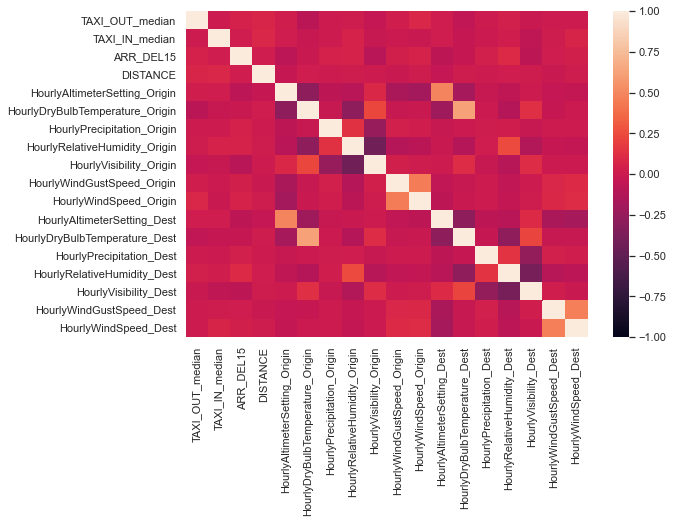

In [8]:
# Heatmap showing global correlations
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(df_all.corr(), vmin=-1, vmax=1, annot=False, cbar=True, cmap=sns.cm.rocket);

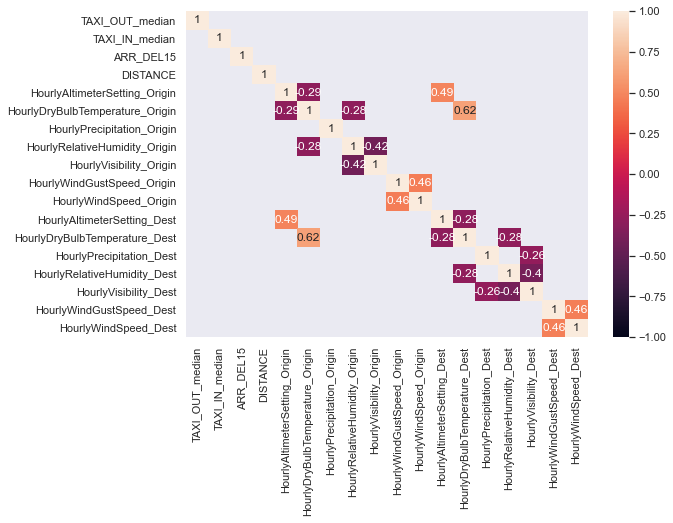

In [9]:
# Heatmap showing remarkable correlations
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(df_all.corr(), vmin=-1, vmax=1, annot=True, cbar=True, cmap=sns.cm.rocket, mask=abs(df_all.corr()) < 0.25);

## Dataset overview

In [10]:
# For deterministic purposes, let's define a seed:
np.random.seed(0)

In [11]:
# For the initial runs, define a reasonably-sized sample:
sample_length =  int(1e5)
# # Once everything is set up, use the entire dataset:
# sample_length = len(df_all)

# Although the dataset is somehow imbalanced (80% on-time / 20% delayed), let's try to keep it as is for this test:
df = df_all.sample(sample_length)

# # Get dummies for the categorical features:
# df = pd.get_dummies(df)

print("On-time flights: {:7d} ({:5.2f}%)".format(len(df[df['ARR_DEL15'] == 0]), 100*len(df[df['ARR_DEL15'] == 0])/len(df)))
print("Delayed flights: {:7d} ({:5.2f}%)".format(len(df[df['ARR_DEL15'] == 1]), 100*len(df[df['ARR_DEL15'] == 1])/len(df)))

On-time flights:   81090 (81.09%)
Delayed flights:   18910 (18.91%)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 3046636 to 4934132
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   MONTH                            100000 non-null  string 
 1   DAY_OF_WEEK                      100000 non-null  string 
 2   OP_UNIQUE_CARRIER                100000 non-null  string 
 3   ORIGIN                           100000 non-null  string 
 4   DEST                             100000 non-null  string 
 5   DEP_TIME_hour                    100000 non-null  string 
 6   TAXI_OUT_median                  100000 non-null  int32  
 7   TAXI_IN_median                   100000 non-null  int32  
 8   ARR_DEL15                        100000 non-null  int32  
 9   ARR_TIME_hour                    100000 non-null  string 
 10  DISTANCE                         100000 non-null  int32  
 11  HourlyAltimeterSetting_Origin    100000 non-null  float64


# Preprocessing

### Train / Test split
Break the dataset into three blocks:
1. Training (80%) → cross-validation
2. Test (20%) → final evaluation

In [13]:
# Separate input features from the target:
X = df.drop('ARR_DEL15', axis=1)
y = df['ARR_DEL15']

# Train-test split the data in a stratified way in accordance with target distribution:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 26), (20000, 26), (80000,), (20000,))

In [14]:
def otp_describe(y_train, y_test):
    print("TRAIN:")
    print("On-time flights: {:7d} ({:5.2f}%)".format(len(y_train[y_train == 0]), 100*len(y_train[y_train == 0])/len(y_train)))
    print("Delayed flights: {:7d} ({:5.2f}%)".format(len(y_train[y_train == 1]), 100*len(y_train[y_train == 1])/len(y_train)))
    print("TEST:")
    print("On-time flights: {:7d} ({:5.2f}%)".format(len(y_test[y_test == 0]), 100*len(y_test[y_test == 0])/len(y_test)))
    print("Delayed flights: {:7d} ({:5.2f}%)".format(len(y_test[y_test == 1]), 100*len(y_test[y_test == 1])/len(y_test)))

otp_describe(y_train, y_test)

TRAIN:
On-time flights:   64872 (81.09%)
Delayed flights:   15128 (18.91%)
TEST:
On-time flights:   16218 (81.09%)
Delayed flights:    3782 (18.91%)


# Baseline model: `LogisticRegression`

In [15]:
# Define the cross-validation folding strategy:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Define a basic classifier:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='sag', max_iter=1000, random_state=0)

# Instantiate the basic target encoder:
from category_encoders.target_encoder import TargetEncoder
# te = TargetEncoder()
targetEncoder = TargetEncoder(verbose=0,
                              cols=X_train.select_dtypes(['string', 'category', 'object']).columns,
                              drop_invariant=False, return_df=True,
                              handle_missing='value', handle_unknown='value',
                              min_samples_leaf=1, smoothing=1.0) # Higher 'smoothing' value means stronger regularization

# CAUTION !! Issue experienced when columns had "String" dtypes: google "StringArray' object has no attribute 'tolist' #270"
X_train[X_train.select_dtypes('string').columns] = X_train[X_train.select_dtypes('string').columns].astype('object')

# Indicate numerical and categorical features:
num_attribs = X_train.select_dtypes('number').columns
cat_attribs = X_train.select_dtypes(['string', 'category', 'object']).columns

# Define what transformations shall apply to NUMERICAL columns:
num_pipeline = Pipeline([
#                          ('imputer', SimpleImputer(strategy="median")),
                         ('std_scaler', StandardScaler()),
                        ])

# Define what transformations shall apply to CATEGORICAL columns:
cat_pipeline = Pipeline([
                         ('te', targetEncoder), # ('onehot', OneHotEncoder()),
                        ])

# Declare the combined pipeline:
full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", cat_pipeline, cat_attribs),
                                  ])

# Define the model pipeline:
pipe = Pipeline([
                 ("preprocessing_pipe", full_pipeline),
                 ("clf", clf),
                ])

#Grid to serch for the hyperparameters:
lr_pipe_grid = {
                "clf__C": [0.1, 1, 10],
               }

# Instantiate the grid search:
from sklearn.model_selection import GridSearchCV
lr_pipe_cv = GridSearchCV(
                          pipe,
                          param_grid=lr_pipe_grid,
                          scoring='recall',
                          n_jobs=-2,
                          cv=skf,
                         )

lr_pipe_cv.fit(X_train, y_train)

lr_pipe_cv.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


array([0, 0, 0, ..., 0, 0, 0])

In [16]:
lr_model = lr_pipe_cv.best_estimator_
lr_model

Pipeline(steps=[('preprocessing_pipe',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['TAXI_OUT_median', 'TAXI_IN_median', 'DISTANCE',
       'HourlyAltimeterSetting_Origin', 'HourlyDryBulbTemperature_Origin',
       'HourlyPrecipitation_Origin', 'HourlyRelativeHumidity_Origin',
       'HourlyVisibility_Origin', 'HourlyWindGustSp...
       'DEP_TIME_hour', 'ARR_TIME_hour', 'HourlySkyConditions_Origin',
       'HourlySkyConditions_Dest'],
      dtype='object')))]),
                                                  Index(['MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST',
       'DEP_TIME_hour', 'ARR_TIME_hour', 'HourlySkyConditions_Origin',
       'HourlySkyConditions_Dest'],
      dtype='object'))])),
                ('clf',
                 

In [17]:
import psutil

# gives a single float value
print("CPU:", psutil.cpu_percent())
print("RAM:", psutil.virtual_memory().percent)

CPU: 62.7
RAM: 47.0


In [18]:
i = y_test.to_frame()[y_test == 1].index[0]
print("True:", y_test.loc[i])
if lr_pipe_cv.predict(X_test.loc[[i], :])[0] == 0:
    perc = lr_pipe_cv.predict_proba(X_test.loc[[i], :])[0][0] * 100
elif lr_pipe_cv.predict(X_test.loc[[i], :])[0] == 1:
    perc = lr_pipe_cv.predict_proba(X_test.loc[[i], :])[0][1] * 100
print("Prediction: {} ({:5.2f}%)".format(lr_pipe_cv.predict(X_test.loc[[i], :])[0], perc))

X_test.loc[[i], :]

# SEGUIR ESTE ESQUEMA PARA EL FRONTEND !!
# ES DECIR, SE CARGA EL MODELO, SE HACE UN ".predict()" DEL DATAFRAME CONSTRUIDO CON LOS INPUTS DE USUARIO, Y LISTO!

True: 1
Prediction: 0 (59.27%)


,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_hour,TAXI_OUT_median,TAXI_IN_median,ARR_TIME_hour,DISTANCE,HourlyAltimeterSetting_Origin,HourlyDryBulbTemperature_Origin,HourlyPrecipitation_Origin,HourlyRelativeHumidity_Origin,HourlySkyConditions_Origin,HourlyVisibility_Origin,HourlyWindGustSpeed_Origin,HourlyWindSpeed_Origin,HourlyAltimeterSetting_Dest,HourlyDryBulbTemperature_Dest,HourlyPrecipitation_Dest,HourlyRelativeHumidity_Dest,HourlySkyConditions_Dest,HourlyVisibility_Dest,HourlyWindGustSpeed_Dest,HourlyWindSpeed_Dest
185037,05,5,YX,LGA,ATL,17,25,9,20,762,30.01,51,0.0,89,OVC,4,0,10,29.96,76,0.0,67,SCT,10,0,5


# Production model: `XGBoost`

In [19]:
from xgboost import XGBClassifier

In [20]:
# Summarize classes distribution:
from collections import Counter

counter = Counter(y_train)
total_negative_examples = counter[0]
total_positive_examples = counter[1]

# A sensible default value to set for the scale_pos_weight hyperparameter is the inverse of the class distribution:
scale_pos_weight = total_negative_examples / total_positive_examples

print("TRAINING DATASET")
print("Total dataset:      {:7d} ({:6.2f}%)".format(len(X_train), 100*len(X_train)/len(X_train)))
print("On-time:            {:7d} ( {:5.2f}%)".format(total_negative_examples, 100*total_negative_examples/len(X_train)))
print("Delayed:            {:7d} ( {:5.2f}%)".format(total_positive_examples, 100*total_positive_examples/len(X_train)))
print("'scale_pos_weight' value: {:5.2f}".format(scale_pos_weight))

TRAINING DATASET
Total dataset:        80000 (100.00%)
On-time:              64872 ( 81.09%)
Delayed:              15128 ( 18.91%)
'scale_pos_weight' value:  4.29


In [21]:
# Define the cross-validation folding strategy:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Define a basic classifier:
clf = XGBClassifier(use_label_encoder=False, verbosity=1, random_state=0, objective= 'binary:logistic',
                    booster='gbtree', tree_method='auto', num_boost_round = 10000, early_stopping_round=10,
                    scale_pos_weight=scale_pos_weight)

# Instantiate the basic target encoder:
from category_encoders.target_encoder import TargetEncoder
# te = TargetEncoder()
targetEncoder = TargetEncoder(verbose=0,
                              cols=X_train.select_dtypes(['string', 'category', 'object']).columns,
                              drop_invariant=False, return_df=True,
                              handle_missing='value', handle_unknown='value',
                              min_samples_leaf=1, smoothing=1.0) # Higher 'smoothing' value means stronger regularization

# CAUTION !! Issue experienced when columns had "String" dtypes: google "StringArray' object has no attribute 'tolist' #270"
X_train[X_train.select_dtypes('string').columns] = X_train[X_train.select_dtypes('string').columns].astype('object')
# X_train[X_train.select_dtypes('object').columns] = X_train[X_train.select_dtypes('object').columns].astype('string')

# Indicate numerical and categorical features:
num_attribs = X_train.select_dtypes('number').columns
cat_attribs = X_train.select_dtypes(['string', 'category', 'object']).columns

# Define what transformations shall apply to NUMERICAL columns:
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="median")),
                         ('std_scaler', StandardScaler()),
                        ])

# Define what transformations shall apply to CATEGORICAL columns:
cat_pipeline = Pipeline([
                         ('te', targetEncoder), # ('onehot', OneHotEncoder()),
                        ])

# Declare the combined pipeline:
full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", cat_pipeline, cat_attribs),
                                  ])

# Define the model pipeline:
pipe = Pipeline([
                 ("preprocessing_pipe", full_pipeline),
                 ("clf", clf),
                ])

# Grid to serch for the hyperparameters:
xgb_pipe_grid = {
                 'clf__subsample' : [0.9],
                 'clf__reg_lambda' : [1],
                 'clf__reg_alpha' : [0.0001],
                 'clf__n_estimators' : [350],
                 'clf__min_child_weight' : [100],
                 'clf__max_depth' : [8],
                 'clf__learning_rate' : [0.05],
                 'clf__gamma' : [0.5],
                 'clf__colsample_bytree' : [0.7]
                }
# xgb_pipe_grid = {
#                  'clf__min_child_weight' : [100, 150, 200],
#                  'clf__gamma' : [0.5],
#                  'clf__subsample' : [0.9],
#                  'clf__colsample_bytree' : [0.7],
#                  'clf__max_depth' : [6, 7, 8, 9],
#                  'clf__learning_rate' : [0.05, 0.1, 0.15],
#                  'clf__n_estimators' : [200, 350, 500],
#                  'clf__reg_alpha' : [1e-4],
#                  'clf__reg_lambda' : [1]
#                 }
# xgb_pipe_grid = {
#                  'clf__min_child_weight' : [1, 10, 25, 50, 100, 150, 200],
#                  'clf__gamma' : [0.1, 0.5, 1, 1.5, 2, 5],
#                  'clf__subsample' : [0.6, 0.8, 1.0],
#                  'clf__colsample_bytree' : [0.6, 0.8, 1.0],
#                  'clf__max_depth' : [3, 4, 5, 6, 7, 8, 9],
#                  'clf__learning_rate' : [0.05, 0.1, 0.15],
#                  'clf__n_estimators' : [50, 100, 250, 300, 350, 400, 450, 500],
#                  'clf__reg_alpha' : [1e-6, 1e-5, 1e-4],
#                  'clf__reg_lambda' : [0.5, 1, 1.5]
#                 }



# Instantiate the grid search:
# from sklearn.model_selection import GridSearchCV
# xgb_pipe_cv = GridSearchCV(
#                            pipe,
#                            param_grid=xgb_pipe_grid,
#                            scoring='recall',
#                            n_jobs=-2,
#                            cv=skf,
#                            verbose=10
#                           )
from sklearn.model_selection import RandomizedSearchCV
xgb_pipe_cv = RandomizedSearchCV(
                                pipe,
                                param_distributions=xgb_pipe_grid,
                                n_iter=50,
                                scoring='recall',
                                n_jobs=-2,
                                cv=skf,
                                verbose=10
                               )

xgb_pipe_cv.fit(X_train, y_train)

xgb_pipe_cv.predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of   5 | elapsed:  1.0min remaining:  1.5min
[Parallel(n_jobs=-2)]: Done   3 out of   5 | elapsed:  1.0min remaining:   40.0s
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:  1.7min finished
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


[18:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stopping_round, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0, 1, 1, ..., 0, 1, 0])

In [22]:
xgb_model = xgb_pipe_cv.best_estimator_
xgb_model

Pipeline(steps=[('preprocessing_pipe',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['TAXI_OUT_median', 'TAXI_IN_median', 'DISTANCE',
       'HourlyAltimeterSetting_Origin', 'HourlyDryBulbTemperature_Origin',
       'HourlyPrecipitation_Origin', 'HourlyRelativeHumidity_Origin...
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=8,
                               min_child_weight=100, missing=nan,
                               monotone_constraints='()', n_estimators=350,
                    

# Additional model: `GaussianNB`

In [23]:
# Define the cross-validation folding strategy:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Define a basic classifier:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

# Instantiate the basic target encoder:
from category_encoders.target_encoder import TargetEncoder
# te = TargetEncoder()
targetEncoder = TargetEncoder(verbose=0,
                              cols=X_train.select_dtypes(['string', 'category', 'object']).columns,
                              drop_invariant=False, return_df=True,
                              handle_missing='value', handle_unknown='value',
                              min_samples_leaf=1, smoothing=1.0) # Higher 'smoothing' value means stronger regularization

# CAUTION !! Issue experienced when columns had "String" dtypes: google "StringArray' object has no attribute 'tolist' #270"
X_train[X_train.select_dtypes('string').columns] = X_train[X_train.select_dtypes('string').columns].astype('object')
# X_train[X_train.select_dtypes('object').columns] = X_train[X_train.select_dtypes('object').columns].astype('string')

# Indicate numerical and categorical features:
num_attribs = X_train.select_dtypes('number').columns
cat_attribs = X_train.select_dtypes(['string', 'category', 'object']).columns

# Define what transformations shall apply to NUMERICAL columns:
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="median")),
                         ('std_scaler', StandardScaler()),
                        ])

# Define what transformations shall apply to CATEGORICAL columns:
cat_pipeline = Pipeline([
                         ('te', targetEncoder), # ('onehot', OneHotEncoder()),
                        ])

# Declare the combined pipeline:
full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", cat_pipeline, cat_attribs),
                                  ])

# Define the model pipeline:
pipe = Pipeline([
                 ("preprocessing_pipe", full_pipeline),
                 ("clf", clf),
                ])

# Grid to serch for the hyperparameters:
gnb_pipe_grid = {
                 'clf__var_smoothing' : [1e-7, 1e-9, 1e-8],
                }

# Instantiate the grid search:
from sklearn.model_selection import GridSearchCV
gnb_pipe_cv = GridSearchCV(
                           pipe,
                           param_grid=gnb_pipe_grid,
                           scoring='recall',
                           n_jobs=-2,
                           cv=skf,
                           verbose=10
                          )

gnb_pipe_cv.fit(X_train, y_train)

gnb_pipe_cv.predict(X_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-2)]: Done   7 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-2)]: Done  12 out of  15 | elapsed:    9.5s remaining:    2.3s
[Parallel(n_jobs=-2)]: Done  15 out of  15 | elapsed:   11.6s finished
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


array([0, 0, 1, ..., 0, 0, 1])

In [24]:
gnb_model = gnb_pipe_cv.best_estimator_
gnb_model

Pipeline(steps=[('preprocessing_pipe',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['TAXI_OUT_median', 'TAXI_IN_median', 'DISTANCE',
       'HourlyAltimeterSetting_Origin', 'HourlyDryBulbTemperature_Origin',
       'HourlyPrecipitation_Origin', 'HourlyRelativeHumidity_Origin...
                                                                   TargetEncoder(cols=Index(['MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST',
       'DEP_TIME_hour', 'ARR_TIME_hour', 'HourlySkyConditions_Origin',
       'HourlySkyConditions_Dest'],
      dtype='object')))]),
             

# Additional model: `KNeighborsClassifier`

In [25]:
# Define the cross-validation folding strategy:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Define a basic classifier:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

# Instantiate the basic target encoder:
from category_encoders.target_encoder import TargetEncoder
# te = TargetEncoder()
targetEncoder = TargetEncoder(verbose=0,
                              cols=X_train.select_dtypes(['string', 'category', 'object']).columns,
                              drop_invariant=False, return_df=True,
                              handle_missing='value', handle_unknown='value',
                              min_samples_leaf=1, smoothing=1.0) # Higher 'smoothing' value means stronger regularization

# CAUTION !! Issue experienced when columns had "String" dtypes: google "StringArray' object has no attribute 'tolist' #270"
X_train[X_train.select_dtypes('string').columns] = X_train[X_train.select_dtypes('string').columns].astype('object')
# X_train[X_train.select_dtypes('object').columns] = X_train[X_train.select_dtypes('object').columns].astype('string')

# Indicate numerical and categorical features:
num_attribs = X_train.select_dtypes('number').columns
cat_attribs = X_train.select_dtypes(['string', 'category', 'object']).columns

# Define what transformations shall apply to NUMERICAL columns:
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="median")),
                         ('std_scaler', StandardScaler()),
                        ])

# Define what transformations shall apply to CATEGORICAL columns:
cat_pipeline = Pipeline([
                         ('te', targetEncoder), # ('onehot', OneHotEncoder()),
                        ])

# Declare the combined pipeline:
full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", cat_pipeline, cat_attribs),
                                  ])

# Define the model pipeline:
pipe = Pipeline([
                 ("preprocessing_pipe", full_pipeline),
                 ("clf", clf),
                ])

# Grid to serch for the hyperparameters:
knc_pipe_grid = {
                 'clf__n_neighbors' : [5, 50, 500],
                }

# Instantiate the grid search:
from sklearn.model_selection import GridSearchCV
knc_pipe_cv = GridSearchCV(
                           pipe,
                           param_grid=knc_pipe_grid,
                           scoring='recall',
                           n_jobs=-2,
                           cv=skf,
                           verbose=10
                          )

knc_pipe_cv.fit(X_train, y_train)

knc_pipe_cv.predict(X_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-2)]: Done   7 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-2)]: Done  12 out of  15 | elapsed: 10.1min remaining:  2.5min
[Parallel(n_jobs=-2)]: Done  15 out of  15 | elapsed: 13.0min finished
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


array([0, 0, 0, ..., 0, 0, 1])

In [26]:
knc_model = knc_pipe_cv.best_estimator_
knc_model

Pipeline(steps=[('preprocessing_pipe',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['TAXI_OUT_median', 'TAXI_IN_median', 'DISTANCE',
       'HourlyAltimeterSetting_Origin', 'HourlyDryBulbTemperature_Origin',
       'HourlyPrecipitation_Origin', 'HourlyRelativeHumidity_Origin...
                                                                   TargetEncoder(cols=Index(['MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST',
       'DEP_TIME_hour', 'ARR_TIME_hour', 'HourlySkyConditions_Origin',
       'HourlySkyConditions_Dest'],
      dtype='object')))]),
             

# Additional model: `DecisionTreeClassifier`

In [27]:
# Define the cross-validation folding strategy:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Define a basic classifier:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Instantiate the basic target encoder:
from category_encoders.target_encoder import TargetEncoder
# te = TargetEncoder()
targetEncoder = TargetEncoder(verbose=0,
                              cols=X_train.select_dtypes(['string', 'category', 'object']).columns,
                              drop_invariant=False, return_df=True,
                              handle_missing='value', handle_unknown='value',
                              min_samples_leaf=1, smoothing=1.0) # Higher 'smoothing' value means stronger regularization

# CAUTION !! Issue experienced when columns had "String" dtypes: google "StringArray' object has no attribute 'tolist' #270"
X_train[X_train.select_dtypes('string').columns] = X_train[X_train.select_dtypes('string').columns].astype('object')
# X_train[X_train.select_dtypes('object').columns] = X_train[X_train.select_dtypes('object').columns].astype('string')

# Indicate numerical and categorical features:
num_attribs = X_train.select_dtypes('number').columns
cat_attribs = X_train.select_dtypes(['string', 'category', 'object']).columns

# Define what transformations shall apply to NUMERICAL columns:
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="median")),
                         ('std_scaler', StandardScaler()),
                        ])

# Define what transformations shall apply to CATEGORICAL columns:
cat_pipeline = Pipeline([
                         ('te', targetEncoder), # ('onehot', OneHotEncoder()),
                        ])

# Declare the combined pipeline:
full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", cat_pipeline, cat_attribs),
                                  ])

# Define the model pipeline:
pipe = Pipeline([
                 ("preprocessing_pipe", full_pipeline),
                 ("clf", clf),
                ])

# Grid to serch for the hyperparameters:
dtr_pipe_grid = {
                 'clf__max_depth' : [6, 7, 8],
                }

# Instantiate the grid search:
from sklearn.model_selection import GridSearchCV
dtr_pipe_cv = GridSearchCV(
                           pipe,
                           param_grid=dtr_pipe_grid,
                           scoring='recall',
                           n_jobs=-2,
                           cv=skf,
                           verbose=10
                          )

dtr_pipe_cv.fit(X_train, y_train)

dtr_pipe_cv.predict(X_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-2)]: Done   7 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-2)]: Done  12 out of  15 | elapsed:    9.7s remaining:    2.3s
[Parallel(n_jobs=-2)]: Done  15 out of  15 | elapsed:   11.9s finished
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


array([0, 0, 0, ..., 0, 0, 0])

In [28]:
dtr_model = dtr_pipe_cv.best_estimator_
dtr_model

Pipeline(steps=[('preprocessing_pipe',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['TAXI_OUT_median', 'TAXI_IN_median', 'DISTANCE',
       'HourlyAltimeterSetting_Origin', 'HourlyDryBulbTemperature_Origin',
       'HourlyPrecipitation_Origin', 'HourlyRelativeHumidity_Origin...
                                                                   TargetEncoder(cols=Index(['MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST',
       'DEP_TIME_hour', 'ARR_TIME_hour', 'HourlySkyConditions_Origin',
       'HourlySkyConditions_Dest'],
      dtype='object')))]),
             

# Additional model: `RandomForestClassifier`

In [29]:
# Define the cross-validation folding strategy:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Define a basic classifier:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight='balanced')

# Instantiate the basic target encoder:
from category_encoders.target_encoder import TargetEncoder
# te = TargetEncoder()
targetEncoder = TargetEncoder(verbose=0,
                              cols=X_train.select_dtypes(['string', 'category', 'object']).columns,
                              drop_invariant=False, return_df=True,
                              handle_missing='value', handle_unknown='value',
                              min_samples_leaf=1, smoothing=1.0) # Higher 'smoothing' value means stronger regularization

# CAUTION !! Issue experienced when columns had "String" dtypes: google "StringArray' object has no attribute 'tolist' #270"
X_train[X_train.select_dtypes('string').columns] = X_train[X_train.select_dtypes('string').columns].astype('object')
# X_train[X_train.select_dtypes('object').columns] = X_train[X_train.select_dtypes('object').columns].astype('string')

# Indicate numerical and categorical features:
num_attribs = X_train.select_dtypes('number').columns
cat_attribs = X_train.select_dtypes(['string', 'category', 'object']).columns

# Define what transformations shall apply to NUMERICAL columns:
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="median")),
                         ('std_scaler', StandardScaler()),
                        ])

# Define what transformations shall apply to CATEGORICAL columns:
cat_pipeline = Pipeline([
                         ('te', targetEncoder), # ('onehot', OneHotEncoder()),
                        ])

# Declare the combined pipeline:
full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", cat_pipeline, cat_attribs),
                                  ])

# Define the model pipeline:
pipe = Pipeline([
                 ("preprocessing_pipe", full_pipeline),
                 ("clf", clf),
                ])

# Grid to serch for the hyperparameters:
rfo_pipe_grid = {
                 'clf__max_samples' : [0.9],
                 'clf__n_estimators' : [350],
                 'clf__min_samples_leaf' : [100],
                 'clf__max_depth' : [8],
                 'clf__max_features' : [0.7]
                }

# Instantiate the grid search:
from sklearn.model_selection import GridSearchCV
rfo_pipe_cv = GridSearchCV(
                           pipe,
                           param_grid=rfo_pipe_grid,
                           scoring='recall',
                           n_jobs=-2,
                           cv=skf,
                           verbose=10
                          )

rfo_pipe_cv.fit(X_train, y_train)

rfo_pipe_cv.predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of   5 | elapsed:  2.0min remaining:  3.0min
[Parallel(n_jobs=-2)]: Done   3 out of   5 | elapsed:  2.0min remaining:  1.4min
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:  3.8min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:  3.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


array([0, 1, 0, ..., 0, 1, 0])

In [30]:
rfo_model = rfo_pipe_cv.best_estimator_
rfo_model

Pipeline(steps=[('preprocessing_pipe',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['TAXI_OUT_median', 'TAXI_IN_median', 'DISTANCE',
       'HourlyAltimeterSetting_Origin', 'HourlyDryBulbTemperature_Origin',
       'HourlyPrecipitation_Origin', 'HourlyRelativeHumidity_Origin...
       'HourlySkyConditions_Dest'],
      dtype='object')))]),
                                                  Index(['MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST',
       'DEP_TIME_hour', 'ARR_TIME_hour', 'HourlySkyConditions_Origin',
       'HourlySkyConditions_Dest'],
      dtype='

# Additional model: `AdaBoostClassifier`

In [31]:
# Define the cross-validation folding strategy:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Define a basic classifier:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()

# Instantiate the basic target encoder:
from category_encoders.target_encoder import TargetEncoder
# te = TargetEncoder()
targetEncoder = TargetEncoder(verbose=0,
                              cols=X_train.select_dtypes(['string', 'category', 'object']).columns,
                              drop_invariant=False, return_df=True,
                              handle_missing='value', handle_unknown='value',
                              min_samples_leaf=1, smoothing=1.0) # Higher 'smoothing' value means stronger regularization

# CAUTION !! Issue experienced when columns had "String" dtypes: google "StringArray' object has no attribute 'tolist' #270"
X_train[X_train.select_dtypes('string').columns] = X_train[X_train.select_dtypes('string').columns].astype('object')
# X_train[X_train.select_dtypes('object').columns] = X_train[X_train.select_dtypes('object').columns].astype('string')

# Indicate numerical and categorical features:
num_attribs = X_train.select_dtypes('number').columns
cat_attribs = X_train.select_dtypes(['string', 'category', 'object']).columns

# Define what transformations shall apply to NUMERICAL columns:
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="median")),
                         ('std_scaler', StandardScaler()),
                        ])

# Define what transformations shall apply to CATEGORICAL columns:
cat_pipeline = Pipeline([
                         ('te', targetEncoder), # ('onehot', OneHotEncoder()),
                        ])

# Declare the combined pipeline:
full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", cat_pipeline, cat_attribs),
                                  ])

# Define the model pipeline:
pipe = Pipeline([
                 ("preprocessing_pipe", full_pipeline),
                 ("clf", clf),
                ])

# Grid to serch for the hyperparameters:
ada_pipe_grid = {
                 'clf__n_estimators' : [350],
                 'clf__learning_rate' : [0.05],
                }

# Instantiate the grid search:
from sklearn.model_selection import GridSearchCV
ada_pipe_cv = GridSearchCV(
                           pipe,
                           param_grid=ada_pipe_grid,
                           scoring='recall',
                           n_jobs=-2,
                           cv=skf,
                           verbose=10
                          )

ada_pipe_cv.fit(X_train, y_train)

ada_pipe_cv.predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of   5 | elapsed:   50.6s remaining:  1.3min
[Parallel(n_jobs=-2)]: Done   3 out of   5 | elapsed:   52.1s remaining:   34.7s
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:  1.5min finished
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


array([0, 0, 0, ..., 0, 0, 0])

In [32]:
ada_model = ada_pipe_cv.best_estimator_
ada_model

Pipeline(steps=[('preprocessing_pipe',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['TAXI_OUT_median', 'TAXI_IN_median', 'DISTANCE',
       'HourlyAltimeterSetting_Origin', 'HourlyDryBulbTemperature_Origin',
       'HourlyPrecipitation_Origin', 'HourlyRelativeHumidity_Origin...
                                                                   TargetEncoder(cols=Index(['MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST',
       'DEP_TIME_hour', 'ARR_TIME_hour', 'HourlySkyConditions_Origin',
       'HourlySkyConditions_Dest'],
      dtype='object')))]),
             

# Additional model: `GradientBoostingClassifier`

In [33]:
# Define the cross-validation folding strategy:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Define a basic classifier:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()

# Instantiate the basic target encoder:
from category_encoders.target_encoder import TargetEncoder
# te = TargetEncoder()
targetEncoder = TargetEncoder(verbose=0,
                              cols=X_train.select_dtypes(['string', 'category', 'object']).columns,
                              drop_invariant=False, return_df=True,
                              handle_missing='value', handle_unknown='value',
                              min_samples_leaf=1, smoothing=1.0) # Higher 'smoothing' value means stronger regularization

# CAUTION !! Issue experienced when columns had "String" dtypes: google "StringArray' object has no attribute 'tolist' #270"
X_train[X_train.select_dtypes('string').columns] = X_train[X_train.select_dtypes('string').columns].astype('object')
# X_train[X_train.select_dtypes('object').columns] = X_train[X_train.select_dtypes('object').columns].astype('string')

# Indicate numerical and categorical features:
num_attribs = X_train.select_dtypes('number').columns
cat_attribs = X_train.select_dtypes(['string', 'category', 'object']).columns

# Define what transformations shall apply to NUMERICAL columns:
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="median")),
                         ('std_scaler', StandardScaler()),
                        ])

# Define what transformations shall apply to CATEGORICAL columns:
cat_pipeline = Pipeline([
                         ('te', targetEncoder), # ('onehot', OneHotEncoder()),
                        ])

# Declare the combined pipeline:
full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", cat_pipeline, cat_attribs),
                                  ])

# Define the model pipeline:
pipe = Pipeline([
                 ("preprocessing_pipe", full_pipeline),
                 ("clf", clf),
                ])

# Grid to serch for the hyperparameters:
gbc_pipe_grid = {
                 'clf__n_estimators' : [350],
                 'clf__learning_rate' : [0.05],
                }

# Instantiate the grid search:
from sklearn.model_selection import GridSearchCV
gbc_pipe_cv = GridSearchCV(
                           pipe,
                           param_grid=gbc_pipe_grid,
                           scoring='recall',
                           n_jobs=-2,
                           cv=skf,
                           verbose=10
                          )

gbc_pipe_cv.fit(X_train, y_train)

gbc_pipe_cv.predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of   5 | elapsed:  2.2min remaining:  3.2min
[Parallel(n_jobs=-2)]: Done   3 out of   5 | elapsed:  2.2min remaining:  1.4min
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:  3.6min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:  3.6min finished
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


array([0, 0, 0, ..., 0, 0, 0])

In [34]:
gbc_model = gbc_pipe_cv.best_estimator_
gbc_model

Pipeline(steps=[('preprocessing_pipe',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['TAXI_OUT_median', 'TAXI_IN_median', 'DISTANCE',
       'HourlyAltimeterSetting_Origin', 'HourlyDryBulbTemperature_Origin',
       'HourlyPrecipitation_Origin', 'HourlyRelativeHumidity_Origin...
       'DEP_TIME_hour', 'ARR_TIME_hour', 'HourlySkyConditions_Origin',
       'HourlySkyConditions_Dest'],
      dtype='object')))]),
                                                  Index(['MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST',
       'DEP_TIME_hour', 'ARR_TIME_hour', 'HourlyS

In [35]:
import psutil

# gives a single float value
print("CPU:", psutil.cpu_percent())
print("RAM:", psutil.virtual_memory().percent)

CPU: 69.2
RAM: 48.1


In [36]:
i = y_test.to_frame()[y_test == 1].index[0]
print("True:", y_test.loc[i])
if xgb_pipe_cv.predict(X_test.loc[[i], :])[0] == 0:
    perc = xgb_pipe_cv.predict_proba(X_test.loc[[i], :])[0][0] * 100
elif xgb_pipe_cv.predict(X_test.loc[[i], :])[0] == 1:
    perc = xgb_pipe_cv.predict_proba(X_test.loc[[i], :])[0][1] * 100
print("Prediction: {} ({:5.2f}%)".format(xgb_pipe_cv.predict(X_test.loc[[i], :])[0], perc)) 

X_test.loc[[i], :]

# SEGUIR ESTE ESQUEMA PARA EL FRONTEND !!
# ES DECIR, SE CARGA EL MODELO, SE HACE UN ".predict()" DEL DATAFRAME CONSTRUIDO CON LOS INPUTS DE USUARIO, Y LISTO!

True: 1
Prediction: 1 (70.76%)


,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_hour,TAXI_OUT_median,TAXI_IN_median,ARR_TIME_hour,DISTANCE,HourlyAltimeterSetting_Origin,HourlyDryBulbTemperature_Origin,HourlyPrecipitation_Origin,HourlyRelativeHumidity_Origin,HourlySkyConditions_Origin,HourlyVisibility_Origin,HourlyWindGustSpeed_Origin,HourlyWindSpeed_Origin,HourlyAltimeterSetting_Dest,HourlyDryBulbTemperature_Dest,HourlyPrecipitation_Dest,HourlyRelativeHumidity_Dest,HourlySkyConditions_Dest,HourlyVisibility_Dest,HourlyWindGustSpeed_Dest,HourlyWindSpeed_Dest
185037,05,5,YX,LGA,ATL,17,25,9,20,762,30.01,51,0.0,89,OVC,4,0,10,29.96,76,0.0,67,SCT,10,0,5


## Evaluation

### Additional metrics results

In [37]:
# Evaluate the model's metrics:

from sklearn.metrics import fbeta_score, f1_score, recall_score, precision_score, accuracy_score, \
                            confusion_matrix, classification_report, roc_curve, precision_recall_curve, \
                            roc_auc_score, average_precision_score, plot_roc_curve, plot_precision_recall_curve

def clf_metrics(classifier, X_test, y_test, y_pred):
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("Normalized confusion matrix:\n", confusion_matrix(y_test, y_pred, normalize='true'), '\n')
    print(classification_report(y_test, y_pred, target_names=['on-time', 'delayed']))
    print("F-beta (ß=2) = {:6.3f}".format(fbeta_score(y_test, y_pred, beta=2)))   
    print("F1 =           {:6.3f}".format(f1_score(y_test, y_pred)))   
    print("Recall =       {:6.3f}".format(recall_score(y_test, y_pred)))   
    print("Precision =    {:6.3f}".format(precision_score(y_test, y_pred)))   
    print("Accuracy =     {:6.3f}".format(accuracy_score(y_test, y_pred)))

### Test

In [38]:
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)
y_test_pred_xgb

array([0, 1, 1, ..., 0, 1, 0])

In [39]:
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)
y_test_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
y_train_pred_gnb = gnb_model.predict(X_train)
y_test_pred_gnb = gnb_model.predict(X_test)
y_test_pred_gnb

array([0, 0, 1, ..., 0, 0, 1])

In [41]:
y_train_pred_knc = knc_model.predict(X_train)
y_test_pred_knc = knc_model.predict(X_test)
y_test_pred_knc

array([0, 0, 0, ..., 0, 0, 1])

In [42]:
y_train_pred_dtr = dtr_model.predict(X_train)
y_test_pred_dtr = dtr_model.predict(X_test)
y_test_pred_dtr

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
y_train_pred_rfo = rfo_model.predict(X_train)
y_test_pred_rfo = rfo_model.predict(X_test)
y_test_pred_rfo

array([0, 1, 0, ..., 0, 1, 0])

In [44]:
y_train_pred_ada = ada_model.predict(X_train)
y_test_pred_ada = ada_model.predict(X_test)
y_test_pred_ada

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
y_train_pred_gbc = gbc_model.predict(X_train)
y_test_pred_gbc = gbc_model.predict(X_test)
y_test_pred_gbc

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
models = [xgb_model, lr_model, gnb_model, knc_model, dtr_model, rfo_model, ada_model, gbc_model]
y_train_pred_clf = [y_train_pred_xgb, y_train_pred_lr, y_train_pred_gnb, y_train_pred_knc,
                    y_train_pred_dtr, y_train_pred_rfo, y_train_pred_ada, y_train_pred_gbc]
y_test_pred_clf = [y_test_pred_xgb, y_test_pred_lr, y_test_pred_gnb, y_test_pred_knc,
                   y_test_pred_dtr, y_test_pred_rfo, y_test_pred_ada, y_test_pred_gbc]

for model, y_train_pred, y_test_pred in zip(models, y_train_pred_clf, y_test_pred_clf):
    print(model[-1].__class__.__name__, "\n\n-+-+-+ TRAINING dataset +-+-+-\n")
    clf_metrics(model, X_train, y_train, y_train_pred)
    print("-------------------------------------------------------")
    print("-+-+-+ TEST dataset +-+-+-\n")
    clf_metrics(model, X_test, y_test, y_test_pred)
    print("-------------------------------------------------------\n")

XGBClassifier 

-+-+-+ TRAINING dataset +-+-+-

Confusion matrix:
 [[47792 17080]
 [ 3961 11167]]
Normalized confusion matrix:
 [[0.73671229 0.26328771]
 [0.26183236 0.73816764]] 

              precision    recall  f1-score   support

     on-time       0.92      0.74      0.82     64872
     delayed       0.40      0.74      0.51     15128

    accuracy                           0.74     80000
   macro avg       0.66      0.74      0.67     80000
weighted avg       0.82      0.74      0.76     80000

F-beta (ß=2) =  0.629
F1 =            0.515
Recall =        0.738
Precision =     0.395
Accuracy =      0.737
-------------------------------------------------------
-+-+-+ TEST dataset +-+-+-

Confusion matrix:
 [[11447  4771]
 [ 1509  2273]]
Normalized confusion matrix:
 [[0.70582069 0.29417931]
 [0.39899524 0.60100476]] 

              precision    recall  f1-score   support

     on-time       0.88      0.71      0.78     16218
     delayed       0.32      0.60      0.42      3782

 

              precision    recall  f1-score   support

     on-time       0.81      1.00      0.90     64872
     delayed       0.68      0.01      0.02     15128

    accuracy                           0.81     80000
   macro avg       0.75      0.50      0.46     80000
weighted avg       0.79      0.81      0.73     80000

F-beta (ß=2) =  0.011
F1 =            0.017
Recall =        0.009
Precision =     0.682
Accuracy =      0.812
-------------------------------------------------------
-+-+-+ TEST dataset +-+-+-

Confusion matrix:
 [[16202    16]
 [ 3750    32]]
Normalized confusion matrix:
 [[9.99013442e-01 9.86558145e-04]
 [9.91538868e-01 8.46113168e-03]] 

              precision    recall  f1-score   support

     on-time       0.81      1.00      0.90     16218
     delayed       0.67      0.01      0.02      3782

    accuracy                           0.81     20000
   macro avg       0.74      0.50      0.46     20000
weighted avg       0.78      0.81      0.73     20000

F-b

In [47]:
recalls = []
modelsNames = []
for model, y_test_pred in zip(models, y_test_pred_clf):
    print(model[-1].__class__.__name__)
    print("Recall =       {:6.3f}".format(recall_score(y_test, y_test_pred)))
    modelsNames.append(model[-1].__class__.__name__)
    recalls.append(recall_score(y_test, y_test_pred))

XGBClassifier
Recall =        0.601
LogisticRegression
Recall =        0.038
GaussianNB
Recall =        0.181
KNeighborsClassifier
Recall =        0.100
DecisionTreeClassifier
Recall =        0.070
RandomForestClassifier
Recall =        0.598
AdaBoostClassifier
Recall =        0.008
GradientBoostingClassifier
Recall =        0.076


<AxesSubplot:>

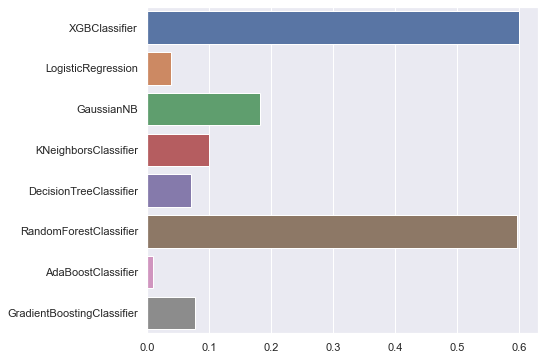

In [49]:
fig, ax = plt.subplots(figsize=(7,6))
sns.barplot(y=np.array(modelsNames), x=np.array(recalls), orient='h', ax=ax)

### ROC curve

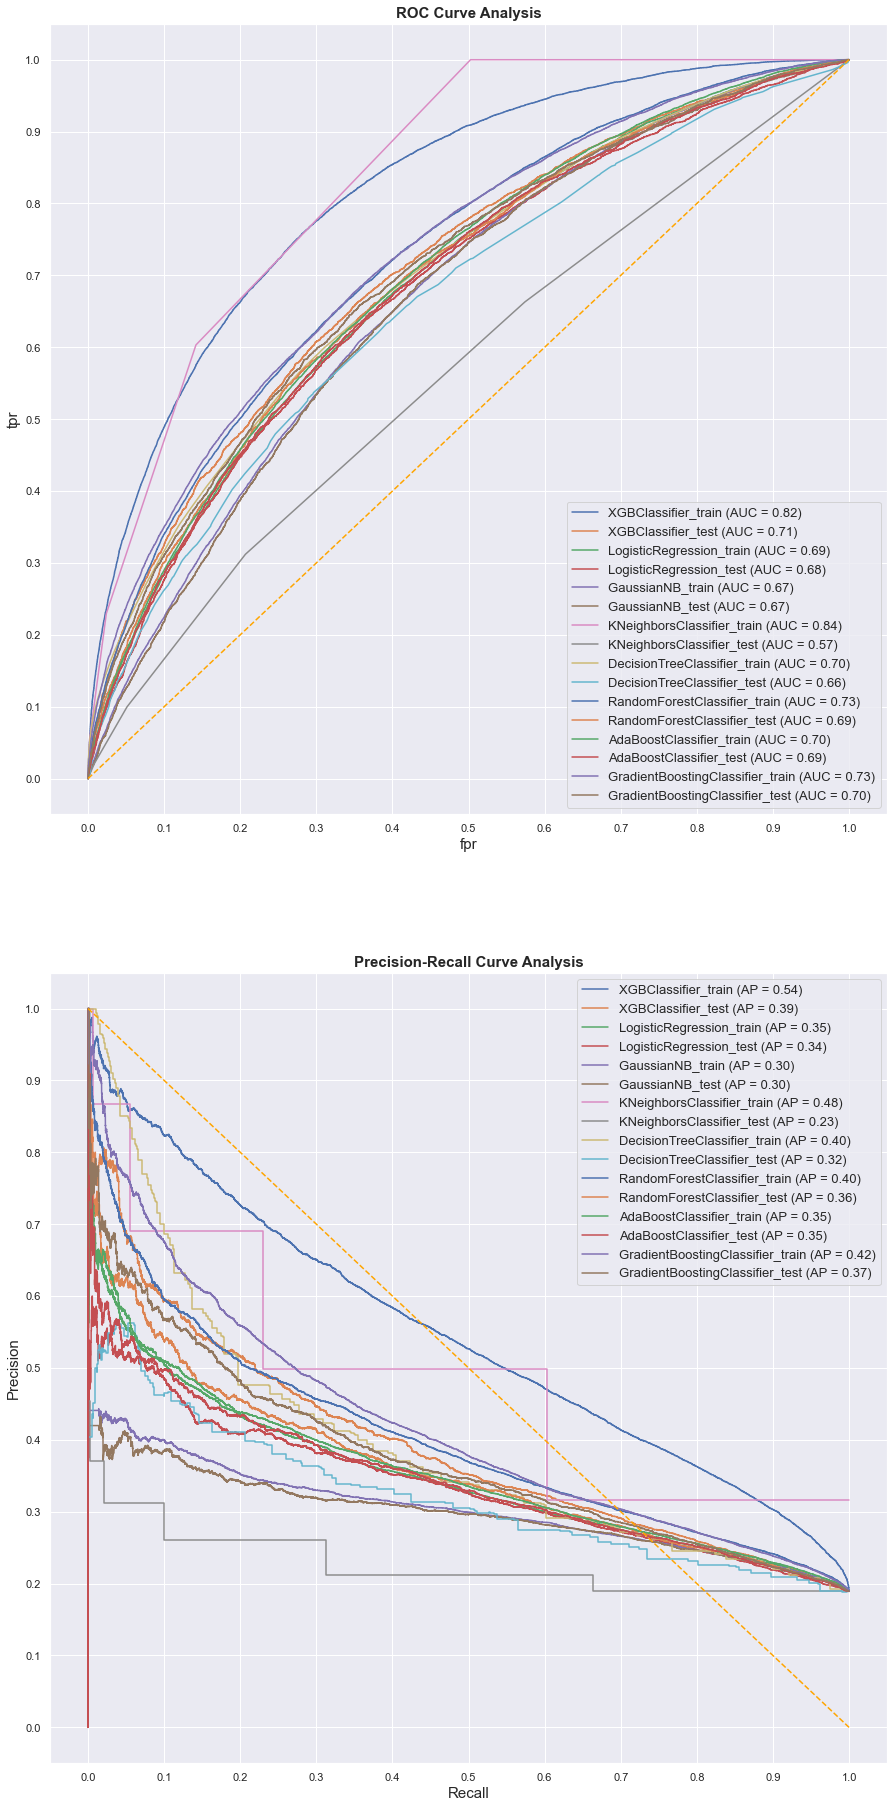

In [50]:
# Plot the figure:
fig, ax = plt.subplots(2, 1, figsize=(15,32))

for model in models:
    plot_roc_curve(model, X_train, y_train, name=model[-1].__class__.__name__ + '_train', ax=ax[0])
    plot_roc_curve(model, X_test, y_test, name=model[-1].__class__.__name__ + '_test', ax=ax[0])

ax[0].plot([0,1], [0,1], color='orange', linestyle='--')

ax[0].set_xticks(np.arange(0.0, 1.1, step=0.1))
ax[0].set_xlabel("fpr", fontsize=15)

ax[0].set_yticks(np.arange(0.0, 1.1, step=0.1))
ax[0].set_ylabel("tpr", fontsize=15)

ax[0].set_title('ROC Curve Analysis', fontweight='bold', fontsize=15)
ax[0].legend(prop={'size':13}, loc='lower right')


for model in models:
    plot_precision_recall_curve(model, X_train, y_train,
                                name=model[-1].__class__.__name__ + '_train', ax=ax[1])
    plot_precision_recall_curve(model, X_test, y_test,
                                name=model[-1].__class__.__name__ + '_test', ax=ax[1])

ax[1].plot([0,1], [1,0], color='orange', linestyle='--')

ax[1].set_xticks(np.arange(0.0, 1.1, step=0.1))
ax[1].set_xlabel("Recall", fontsize=15)

ax[1].set_yticks(np.arange(0.0, 1.1, step=0.1))
ax[1].set_ylabel("Precision", fontsize=15)

ax[1].set_title('Precision-Recall Curve Analysis', fontweight='bold', fontsize=15)
ax[1].legend(prop={'size':13}, loc='upper right');

Considering all the above metrics, an **XGBoost classifier will be used as the base estimator** hereafter.

___

In [51]:
t1 = time.perf_counter() - t0
print("Time elapsed: {:2.0f}h {:2.0f}min {:2.0f}s".format(t1//3600, (t1%3600)//60, (t1%3600)%60))

Time elapsed:  2h  9min 10s


In [52]:
import psutil

# gives a single float value
print("CPU:", psutil.cpu_percent())
print("RAM:", psutil.virtual_memory().percent)

CPU: 25.1
RAM: 44.5


___